<a href="https://colab.research.google.com/github/annettembeyu/Module_2_Week_1/blob/master/Week_1_Module_2_Moringa_School_DSC_09_20200_Annette_Mbeyu_Ngao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Ltd Game Prediction Analysis


# Data Analytic question

To make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).


# Task approach

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

**Approach 1**: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

**Approach 2:** Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



# Understanding the context 

Having been recruited as a football analyst by Mchezopesa Ltd my interest as a data scientist is to make predictions between team 1 and team 2 based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

# Description of the data

**Dataset Columns**

*   Rank
*   Country Abbreviation
*   Total Points
*   Previous Points
*   Rank Change
*   Average Previous Years Points
*   Average Previous Years Points Weighted (50%)
*   Average 2 Years Ago Points
*   Average 2 Years Ago Points Weighted (30%)
*   Average 3 Years Ago Points
*   Average 3 Years Ago Points Weighted (20%)
*   Confederation
*   Date - date of the match
*   Home_team - the name of the home team
*   Away_team - the name of the away team
*   Home_score - full-time home team score including extra time, not including  penalty-shootouts
*   Away_score - full-time away team score including extra time, not including penalty-shootouts
*   Tournament - the name of the tournament
*   City - the name of the city/town/administrative unit where the match was played
*   Country - the name of the country where the match was played
*   Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

# Defining the Metric for Success

The objective will be considered as ahving to a frutiful completion when 
prediction result of the game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training) is accurately done. 



# Data relevance
 
The available data is appropriate in answering the data analytic question

# Experimental design

1.   Loading the data
2.   Checking the data for:

        *  Number of records in the dataset
        *  Preview top records in the dataset
        *  Preview the bottom records in the dataset
        *  Appropriateness of the datatype of the variables in each columns
3.   External Data Source Validation
        * Valiation
4.   Tidying the Dataset:
        * Identifying missing values
        * Check for anomalies
        * Deal with missing data
        * More data cleaning procedure
5.   Exploratory Analysis
        * Ploting the univariate and bivariate summaries and recording our observations
6.  Perform any necessary feature engineering 
7.  Check for multicollinearity
8.  Start building the model
9.  Cross-validate the model
10. Compute RMSE
11. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
12. Perform appropriate regressions on the data including your justification
13. Challenge your solution by providing insights on how you can make improvements.

# Importing the libraries

In [ ]:
import pandas as pd                             #import pandas for dataframe manipulation
import numpy as np                              #import numerical python
import seaborn as sns                           #seaborn for visuals
import matplotlib as mpl                        #matplot for plotting
import matplotlib.pyplot as plt                 #matplot for plotting
import itertools
import datetime as dt                           #convert date formats
from scipy import stats  
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from IPython.display import display             # Allows the use of display() for DataFrames
import warnings                                 # Suppress warnings 
warnings.filterwarnings('ignore') 
import os                                       # File system manangement
import gc                                       # memory management

**Loading the datasets**

In [ ]:
# reading the datasets
results_df = pd.read_csv('results.csv', parse_dates=['date'])
ranking_df=pd.read_csv('fifa_ranking.csv',parse_dates=['rank_date'])

**Finding the shape of the data**

In [ ]:
print('results dataframe shape has: {} Rows, {} Columns'.format(*results_df.shape))
print('ranking dataframe shape has: {} Rows, {} Columns'.format(*ranking_df.shape))

results dataframe shape has: 40839 Rows, 9 Columns
ranking dataframe shape has: 57793 Rows, 16 Columns


**Checking the first rows of the datasets**

In [ ]:
# Printing First Rows Of The Data loaded
display("results dataframe head")
display(results_df.head(20))
display("ranking dataframe head")
display(ranking_df.head(20))
display("results dataframe tail")
display(results_df.tail(20))
display("ranking dataframe tail")
display(ranking_df.tail(20))

'results dataframe head'

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


'ranking dataframe head'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


'results dataframe tail'

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40819,2019-07-12,Solomon Islands,Tahiti,0,3,Pacific Games,Apia,Samoa,True
40820,2019-07-12,New Caledonia,Fiji,1,0,Pacific Games,Apia,Samoa,True
40821,2019-07-13,India,North Korea,2,5,Intercontinental Cup,Ahmedabad,India,False
40822,2019-07-14,Algeria,Nigeria,2,1,African Cup of Nations,Cairo,Egypt,True
40823,2019-07-14,Senegal,Tunisia,1,0,African Cup of Nations,Cairo,Egypt,True
40824,2019-07-15,Tonga,Vanuatu,0,14,Pacific Games,Apia,Samoa,True
40825,2019-07-15,Fiji,Tuvalu,10,1,Pacific Games,Apia,Samoa,True
40826,2019-07-15,Solomon Islands,American Samoa,13,0,Pacific Games,Apia,Samoa,True
40827,2019-07-15,Tahiti,New Caledonia,0,3,Pacific Games,Apia,Samoa,True
40828,2019-07-15,North Korea,Tajikistan,1,0,Intercontinental Cup,Ahmedabad,India,True


'ranking dataframe tail'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57773,192,American Samoa,ASA,38.25,38,-1,0.00,0.00,0.00,0.00,127.50,38.25,0.00,0.00,OFC,2018-06-07
57774,192,Cook Islands,COK,38.25,38,-1,0.00,0.00,0.00,0.00,127.50,38.25,0.00,0.00,OFC,2018-06-07
57775,194,Bangladesh,BAN,34.76,33,3,0.00,0.00,21.25,10.63,35.13,10.54,68.00,13.60,AFC,2018-06-07
57776,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2018-06-07
57777,195,Brunei Darussalam,BRU,34.00,36,0,0.00,0.00,42.50,21.25,0.00,0.00,63.75,12.75,AFC,2018-06-07
57778,197,Djibouti,DJI,31.88,27,1,0.00,0.00,63.75,31.88,0.00,0.00,0.00,0.00,CAF,2018-06-07
57779,197,Samoa,SAM,31.88,38,-6,0.00,0.00,0.00,0.00,106.25,31.88,0.00,0.00,OFC,2018-06-07
57780,199,US Virgin Islands,VIR,17.60,18,0,0.00,0.00,0.00,0.00,0.00,0.00,87.98,17.60,CONCACAF,2018-06-07
57781,200,Sri Lanka,SRI,16.76,17,0,0.00,0.00,8.50,4.25,25.50,7.65,24.29,4.86,AFC,2018-06-07
57782,201,Pakistan,PAK,10.17,10,2,0.00,0.00,0.00,0.00,0.00,0.00,50.83,10.17,AFC,2018-06-07


In [ ]:
# looking at the columns in the dataset
display("results dataframe columns")
display(results_df.columns)
print('*****************************************************************************************')
display("ranking dataframe columns")
display(ranking_df.columns)

'results dataframe columns'

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

*****************************************************************************************


'ranking dataframe columns'

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# checking the data types of the columns
display("The data types for attributes in the results dataframe:")
display(results_df.dtypes)
display("The results dataframe has:")
display(results_df.dtypes.value_counts())
print('******************************************************************************')
display("The data types for attributes in the rankings dataframe:")
display(ranking_df.dtypes)
display("The ranking dataframe has")
display(ranking_df.dtypes.value_counts())


'The data types for attributes in the results dataframe:'

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

'The results dataframe has:'

object            5
int64             2
datetime64[ns]    1
bool              1
dtype: int64

******************************************************************************


'The data types for attributes in the rankings dataframe:'

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

'The ranking dataframe has'

float64           9
int64             3
object            3
datetime64[ns]    1
dtype: int64

# checking for any inconsistencies in the data
 
*   missing values 
*   unique values
*   duplicates






---



In [ ]:
# checking for the missing values
display(results_df.isnull().values.any())
print('Number of missing vaues in result dataframe:')
display(results_df.isnull().sum())
print('The percentage of missing values in the results dataframe:')
display(results_df.isnull().sum().sort_values(ascending=False)/results_df.shape[0] * 100)

False

Number of missing vaues in result dataframe:


date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

The percentage of missing values in the results dataframe:


neutral       0.0
country       0.0
city          0.0
tournament    0.0
away_score    0.0
home_score    0.0
away_team     0.0
home_team     0.0
date          0.0
dtype: float64

There are no missing values in the result dataframe

In [ ]:
# checking for the missing vaues in the ranking data frame
display(ranking_df.isnull().values.any())
print('Missing values in the ranking dataframe')
display(ranking_df.isnull().sum())
print('The percentage of missing values in the ranking dataframe')
display(ranking_df.isnull().sum().sort_values(ascending=False)/ranking_df.shape[0] * 100)

False

Missing values in the ranking dataframe


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

The percentage of missing values in the ranking dataframe


rank_date                  0.0
confederation              0.0
three_year_ago_weighted    0.0
three_year_ago_avg         0.0
two_year_ago_weighted      0.0
two_year_ago_avg           0.0
last_year_avg_weighted     0.0
last_year_avg              0.0
cur_year_avg_weighted      0.0
cur_year_avg               0.0
rank_change                0.0
previous_points            0.0
total_points               0.0
country_abrv               0.0
country_full               0.0
rank                       0.0
dtype: float64

There are no missing values in the ranking dataframe

In [ ]:
# checking for unique vaue in the two datasets
print("The unique values in results dataframe")
display(results_df.nunique().sort_values(ascending=False))
print('**************************************************************************************')
print("The unique values in ranking dataframe")
display(ranking_df.nunique().sort_values(ascending=False))

The unique values in results dataframe


date          15115
city           1960
home_team       309
away_team       306
country         266
tournament      109
home_score       26
away_score       22
neutral           2
dtype: int64

**************************************************************************************
The unique values in ranking dataframe


total_points               11114
three_year_ago_avg          7628
two_year_ago_avg            7575
last_year_avg               7473
cur_year_avg_weighted       7419
cur_year_avg                7419
last_year_avg_weighted      7001
two_year_ago_weighted       6513
three_year_ago_weighted     5849
previous_points             1557
rank_date                    286
country_abrv                 216
country_full                 216
rank                         209
rank_change                  121
confederation                  6
dtype: int64

There are quite a number of missing values in the two dataframes.

In [ ]:
# checking for duplicates in the datasets
print('Duplicates in results dataframe:')
display(results_df.duplicated())
print('***********************************************************************************')
print('Duplicates in ranking data frame:')
display(ranking_df.duplicated())

Duplicates in results dataframe:


0        False
1        False
2        False
3        False
4        False
         ...  
40834    False
40835    False
40836    False
40837    False
40838    False
Length: 40839, dtype: bool

***********************************************************************************
Duplicates in ranking data frame:


0        False
1        False
2        False
3        False
4        False
         ...  
57788    False
57789    False
57790    False
57791    False
57792    False
Length: 57793, dtype: bool

From the output above there are no duplicates in the dataframes

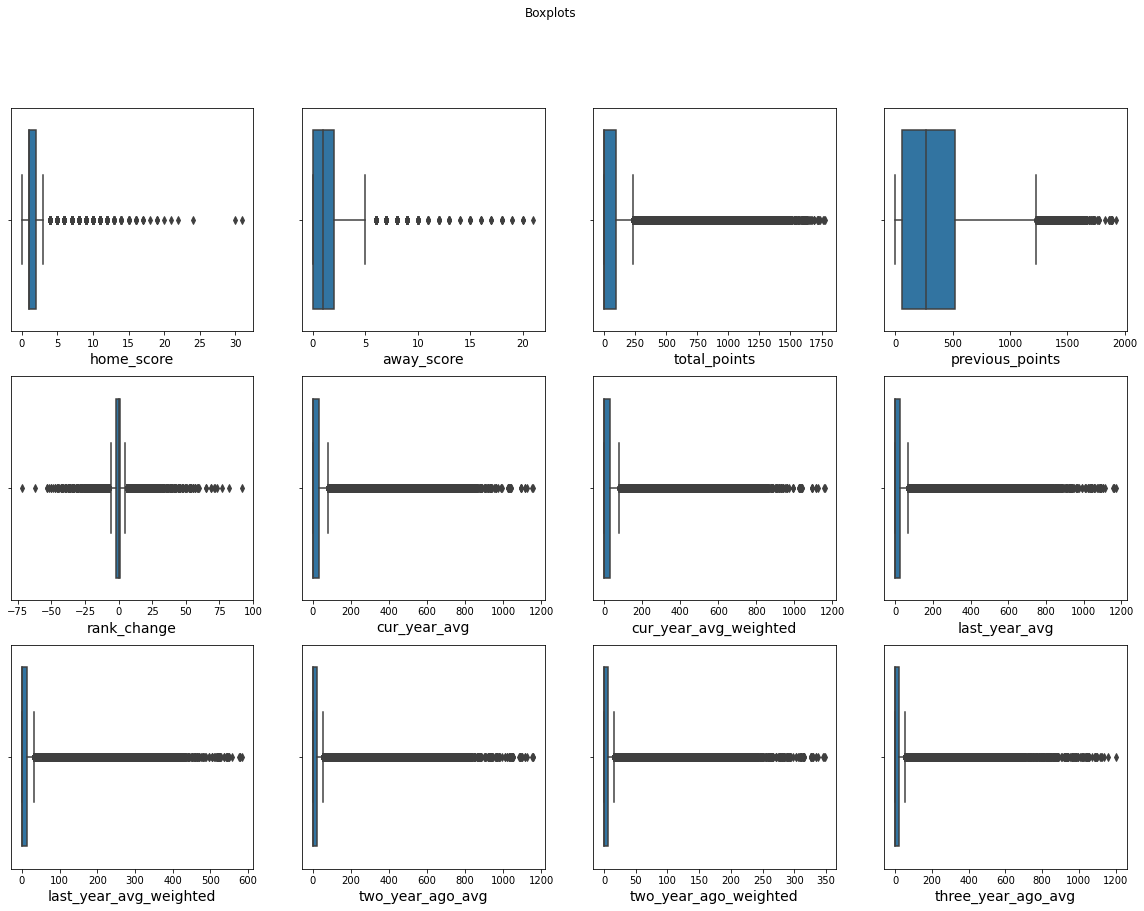

In [ ]:
# Checking for Outliers
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(20, 14))
fig.suptitle('Boxplots')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)
ax5.set_xlabel('xlabel',fontsize=14)
ax6.set_xlabel('xlabel',fontsize=14)
ax7.set_xlabel('xlabel',fontsize=14)
ax8.set_xlabel('xlabel',fontsize=14)
ax9.set_xlabel('xlabel',fontsize=14)
ax10.set_xlabel('xlabel',fontsize=14)
ax11.set_xlabel('xlabel',fontsize=14)
ax12.set_xlabel('xlabel',fontsize=14)
sns.boxplot(results_df['home_score'], ax=ax1)
sns.boxplot(results_df['away_score'], ax=ax2)
sns.boxplot(ranking_df['total_points'], ax=ax3)
sns.boxplot(ranking_df['previous_points'], ax=ax4)
sns.boxplot(ranking_df['rank_change'], ax=ax5)
sns.boxplot(ranking_df['cur_year_avg'], ax=ax6)
sns.boxplot(ranking_df['cur_year_avg_weighted'], ax=ax7)
sns.boxplot(ranking_df['last_year_avg'], ax=ax8)
sns.boxplot(ranking_df['last_year_avg_weighted'], ax=ax9)
sns.boxplot(ranking_df['two_year_ago_avg'], ax=ax10)
sns.boxplot(ranking_df['two_year_ago_weighted'], ax=ax11)
sns.boxplot(ranking_df['three_year_ago_avg'], ax= ax12)

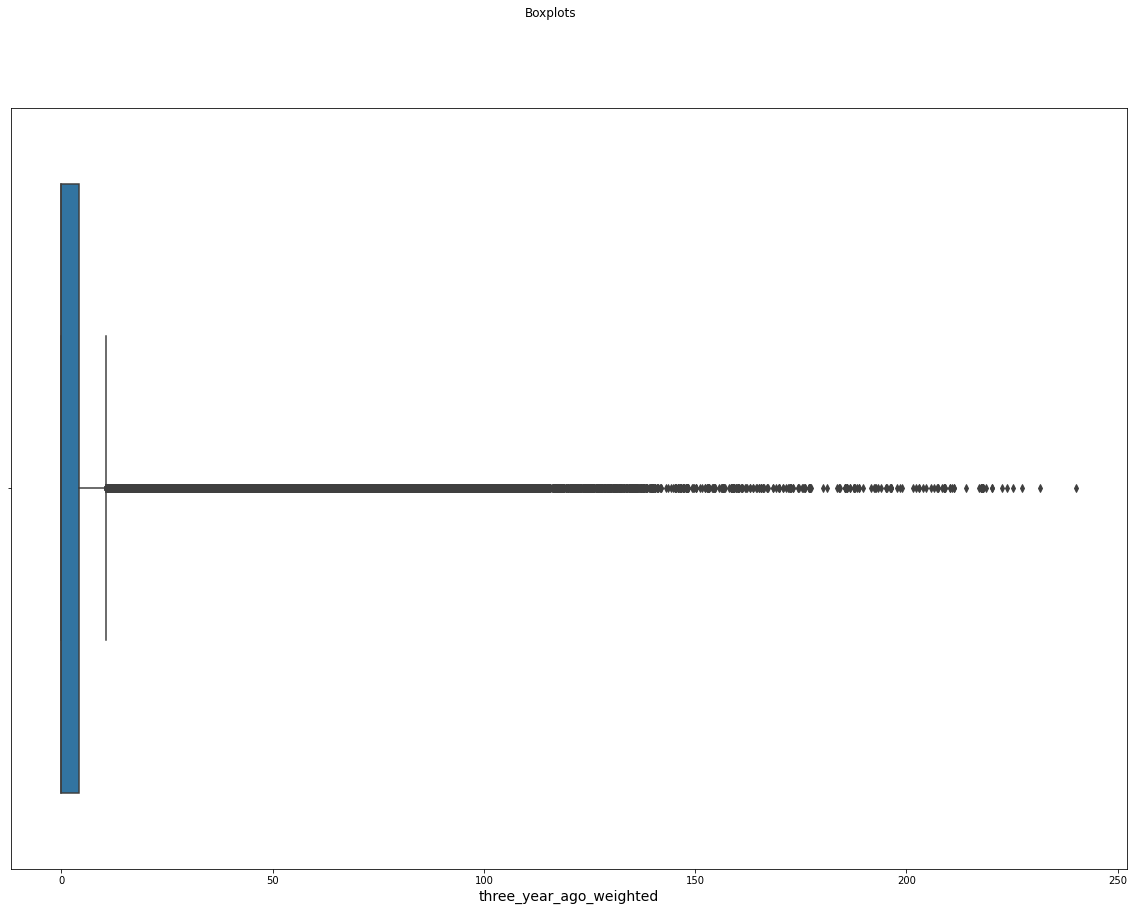

In [ ]:
fig, (ax13) = plt.subplots(1,1, figsize=(20, 14))
fig.suptitle('Boxplots')
ax13.set_xlabel('xlabel',fontsize=14)
sns.boxplot(ranking_df['three_year_ago_weighted'], ax= ax13)

# External data source validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

https://www.kaggle.com/abecklas/fifa-world-cup?select=WorldCupMatches.csv

# Merging the datasets

In [ ]:
display(results_df, ranking_df)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [ ]:
# extracting the year column from the date in the result dataframe
results_df['year'] = pd.DatetimeIndex(results_df['date']).year
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [ ]:
# extracting the month column for the date in the result dataframe
results_df['month'] = pd.DatetimeIndex(results_df['date']).month
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [ ]:
# extracting the year from the rank date in the rank dataframe
ranking_df['year'] = pd.DatetimeIndex(ranking_df['rank_date']).year
ranking_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993


In [ ]:
# extracting the month from the rank date in the ranking dataframe
ranking_df['month'] = pd.DatetimeIndex(ranking_df['rank_date']).month
ranking_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [ ]:
# merging the datasets
merged_df=results_df.merge( ranking_df,left_on=['year','month'], right_on=['year','month'],how='inner')
merged_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# checking the merged dataframe
print('The merged dataframe has: {} Rows, {} Columns'.format(*merged_df.shape))
print('The column names in the dataframe are:')
print(merged_df.columns)
print(display(merged_df.isnull().sum()))

The merged dataframe has: 4293987 Rows, 27 Columns
The column names in the dataframe are:
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month', 'rank',
       'country_full', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')


date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
year                       0
month                      0
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

None


# Exploratory data analysis

**Univariate analysis**

In [ ]:
# statisitcal summaries for the numerical attributes
num_df= merged_df.select_dtypes(np.number).head()
num_df.describe()

,home_score,away_score,year,month,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,5.0,5.0,5.0,5.0,5.000000,5.0,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,0.0,1993.0,8.0,3.000000,0.0,54.000000,2.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,1.581139,0.0,3.316625,4.086563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,1993.0,8.0,1.000000,0.0,50.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,1993.0,8.0,2.000000,0.0,51.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,1993.0,8.0,3.000000,0.0,55.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,1993.0,8.0,4.000000,0.0,57.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,1993.0,8.0,5.000000,0.0,57.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'count')

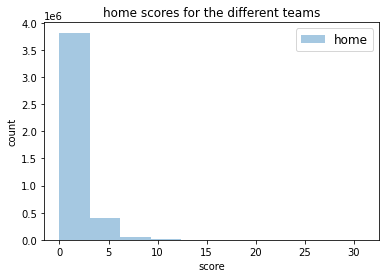

In [ ]:
# distribution for the home score
sns.distplot(merged_df['home_score'],  kde=False, bins=10, label='home')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('home scores for the different teams')
plt.xlabel('score')
plt.ylabel('count')

Text(0, 0.5, 'count')

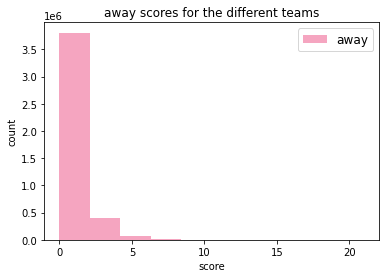

In [ ]:
# distribution for the away score
sns.distplot(merged_df['away_score'],  kde=False, bins=10, color= '#E71F63', label='away')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('away scores for the different teams')
plt.xlabel('score')
plt.ylabel('count')

No handles with labels found to put in legend.


Text(0, 0.5, 'count')

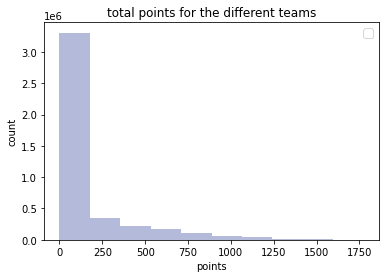

In [ ]:
# distribution for the away score
sns.distplot(merged_df['total_points'],  kde=False, bins=10, color= '#4554A4')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('total points for the different teams')
plt.xlabel('points')
plt.ylabel('count')

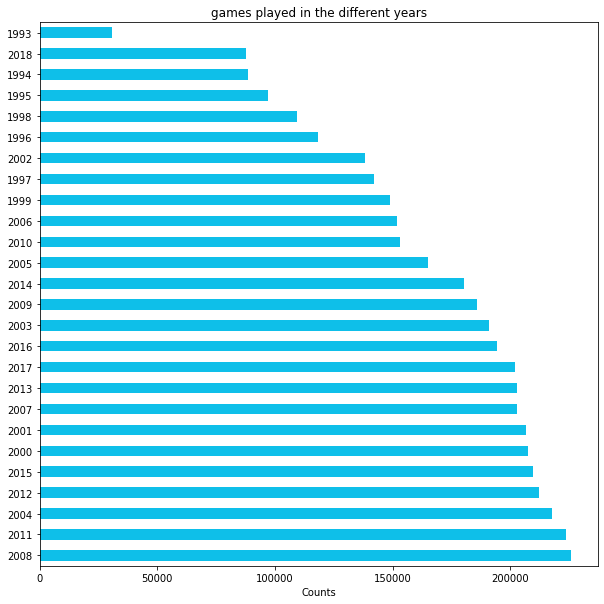

In [ ]:
# the distribution of the respondents job types 
merged_df['year'].value_counts().plot(kind='barh', color='#0EBFE9', figsize=(10,10))
plt.xlabel('Counts')
plt.title('games played in the different years')
plt.show()

1993 had the least number of games played the trend in the games played is not consistent as some years the number increased and in other there was a decline. 2008 had the most number of games played this  could be attributed to the number champions league held during that year.

In [ ]:
print('Number matches played in the diferent tournaments')
print(merged_df.tournament.value_counts())

Number matches played in the diferent tournaments
Friendly                                1584825
FIFA World Cup qualification             941775
UEFA Euro qualification                  295447
African Cup of Nations qualification     212649
AFC Asian Cup qualification               97802
                                         ...   
OSN Cup                                     840
World Unity Cup                             840
Copa del Pacífico                           828
Dragon Cup                                  828
Copa América qualification                  418
Name: tournament, Length: 72, dtype: int64


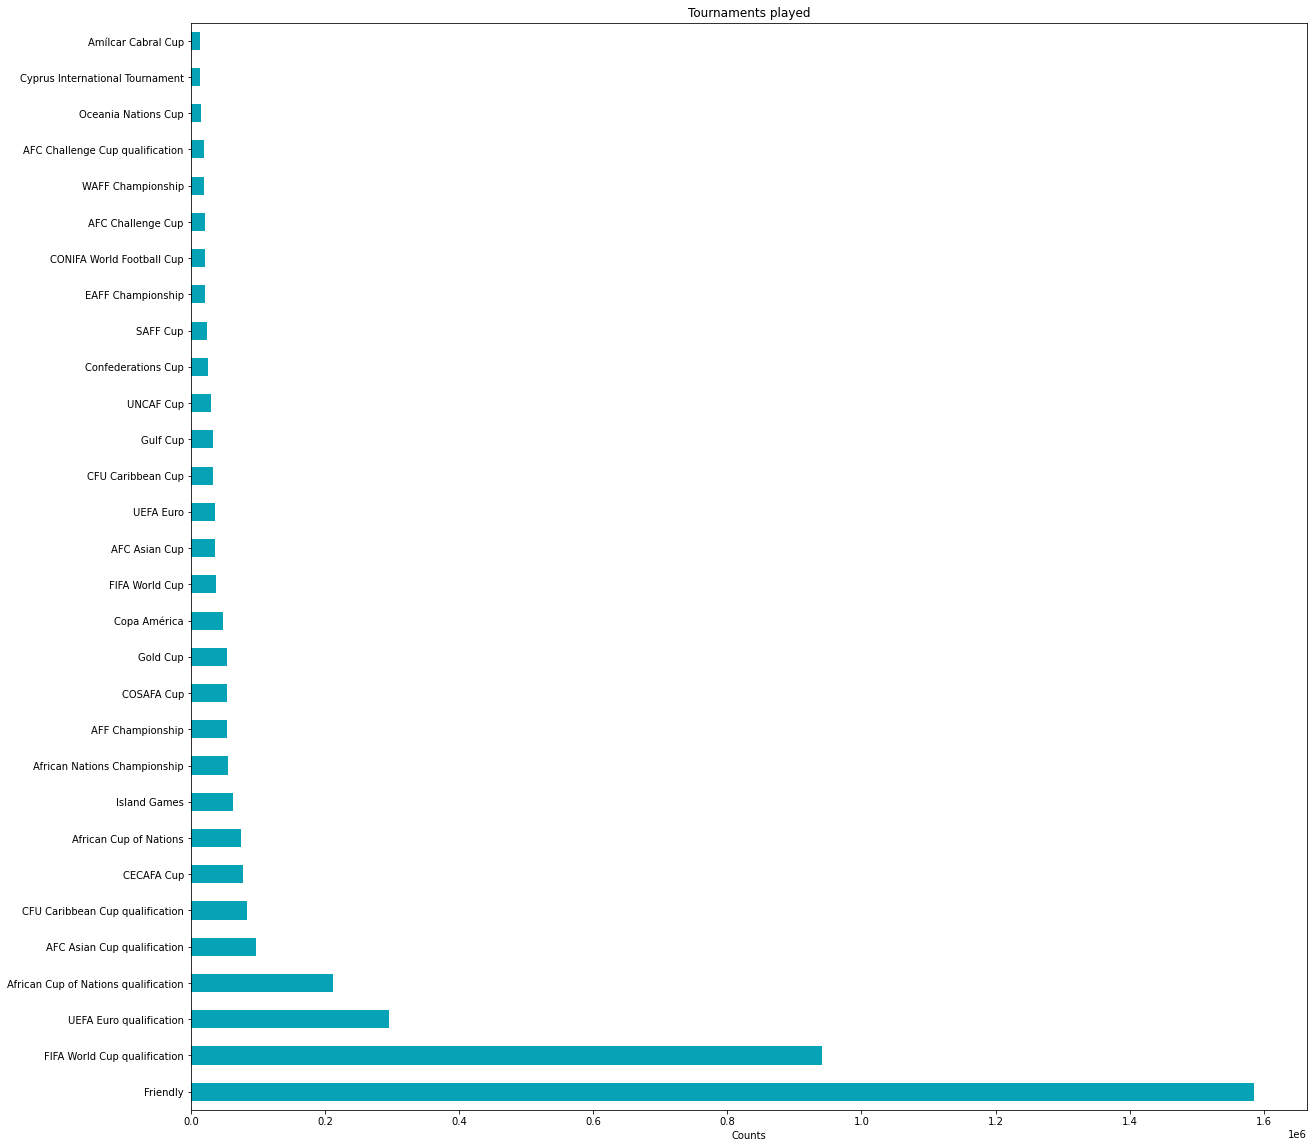

In [ ]:
# the distribution of the number of different tournaments
merged_df['tournament'].value_counts().head(30).plot(kind='barh', color='#06A3B7', figsize=(20,20))
plt.xlabel('Counts')
plt.title('Tournaments played')
plt.show()

Most played matches were friendly matches followed by FIFA World cup qualification matches.

In [ ]:
# count of the number of matches played by the different countries
print('Number of matches played by the countries int the different tournaments')
print(merged_df.country.value_counts())

Number of matches played by the countries int the different tournaments
United States               173387
France                       85955
South Africa                 75573
Qatar                        67188
United Arab Emirates         64475
                             ...  
Northern Mariana Islands       414
Afghanistan                    414
Turks and Caicos Islands       413
Mayotte                        411
Micronesia                     202
Name: country, Length: 231, dtype: int64


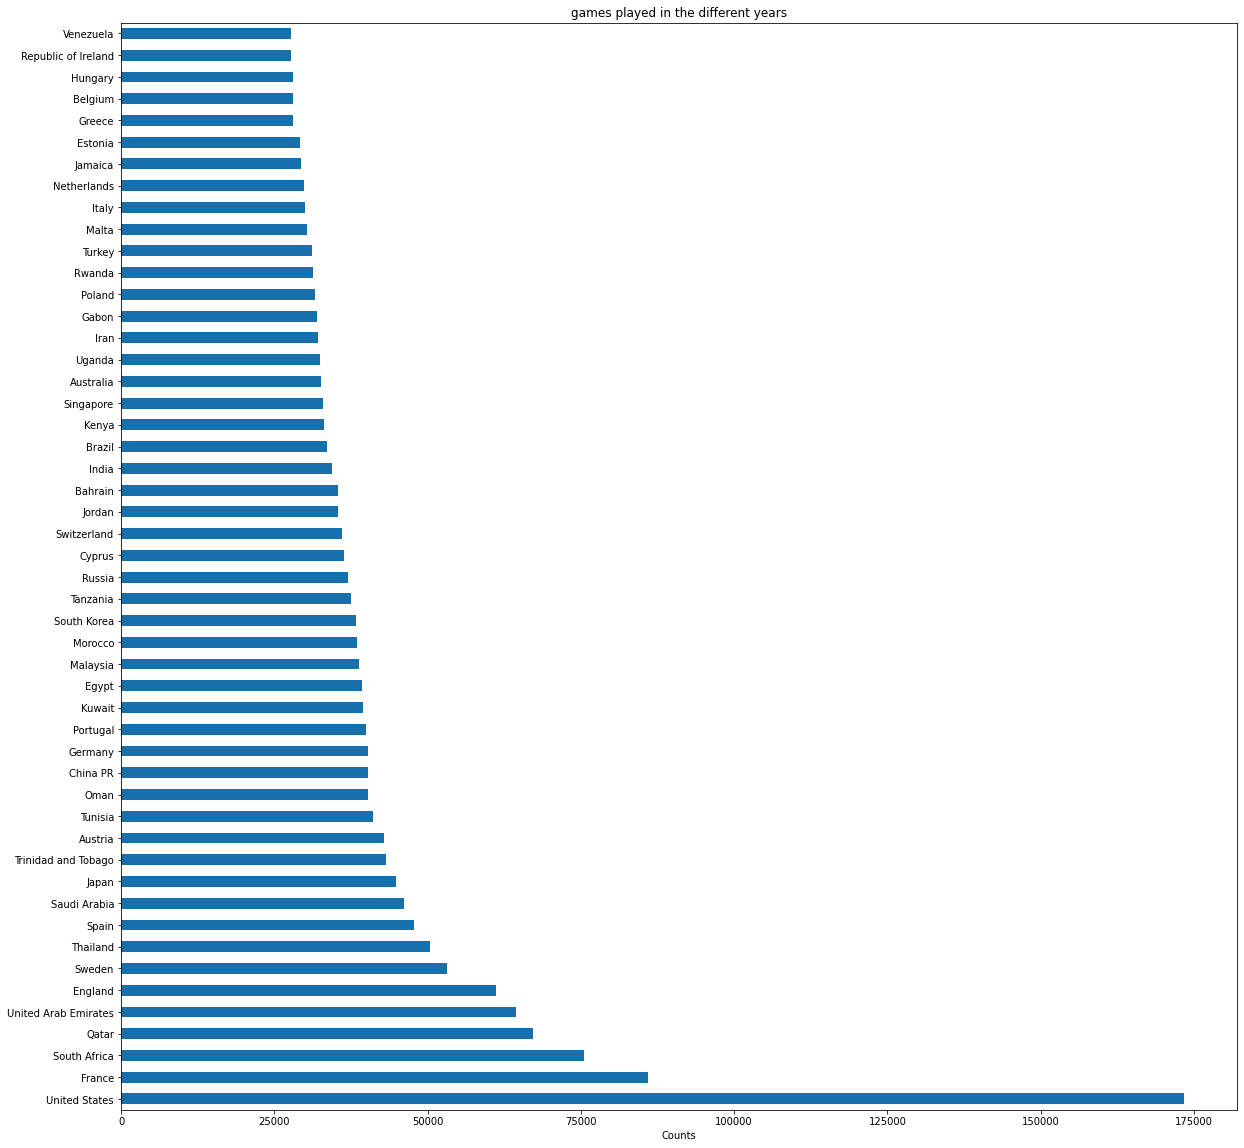

In [ ]:
# the distribution of the respondents job types 
merged_df['country'].value_counts().head(50).plot(kind='barh', color='#1770AB', figsize=(20,20))
plt.xlabel('Counts')
plt.title('games played in the different years')
plt.show()

France and South Africa had the most number of matches played throughout the years.

In [ ]:
# checking if there is any relationship between the home score and away score
score= merged_df[['home_score', 'away_score']]
score.corr()

,home_score,away_score
home_score,1.000000,-0.164898
away_score,-0.164898,1.000000


There is a negative relationship between the home_score and the away_score. In addition the relationship between the two scores is weak

**Feature Engineering**

In [ ]:
# Getting the ranking details for home team
#
home_df = merged_df[merged_df.home_team == merged_df.country_full]
#previewing the first rows of the new dataframe
#
home_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
18,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
236,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
355,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
594,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
725,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,58,Senegal,SEN,0.0,27,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [ ]:
# previewing the last rows in the dataset
home_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
4292958,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,2018,6,27,Senegal,SEN,837.98,825,1,368.23,368.23,537.34,268.67,280.30,84.09,584.93,116.99,CAF,2018-06-07
4293197,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,2018,6,55,Panama,PAN,571.17,574,0,276.92,276.92,309.00,154.50,326.30,97.89,209.29,41.86,CONCACAF,2018-06-07
4293366,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True,2018,6,12,England,ENG,1050.84,1040,1,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07
4293571,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True,2018,6,7,France,FRA,1198.13,1166,0,520.12,520.12,856.75,428.38,393.65,118.09,657.68,131.54,UEFA,2018-06-07
4293789,2018-06-30,Uruguay,Portugal,2,1,FIFA World Cup,Sochi,Russia,True,2018,6,14,Uruguay,URU,1018.41,976,3,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07


In [ ]:
# the shape of the home team data frame
home_df.shape

(18609, 27)

In [ ]:
# Getting the ranking for the away team
away_df = merged_df[merged_df.away_team == merged_df.country_full]

# To preview the first rows of the dataset
away_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
66,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67,Paraguay,PAR,0.00,22,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
171,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,5,Argentina,ARG,0.00,51,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
368,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,35,Ecuador,ECU,0.00,23,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
508,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,8,Brazil,BRA,0.00,55,-5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
692,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,25,Zambia,ZAM,0.00,38,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292947,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,2018,6,16,Colombia,COL,985.97,989,0,292.09,292.09,655.57,327.78,665.76,199.73,831.89,166.38,CONMEBOL,2018-06-07
4293163,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,2018,6,21,Tunisia,TUN,909.91,1012,-7,545.56,545.56,394.79,197.39,227.59,68.28,493.39,98.68,CAF,2018-06-07
4293356,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True,2018,6,3,Belgium,BEL,1298.32,1346,0,629.98,629.98,645.63,322.82,529.80,158.94,932.92,186.58,UEFA,2018-06-07
4293569,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True,2018,6,5,Argentina,ARG,1241.45,1254,0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07


In [ ]:
# the shape of the away team ranking dataframe
away_df.shape

(18526, 27)

In [ ]:
ranked_df = pd.merge(home_df, away_df, how = 'left', left_on =['year', 'month', 'home_team', 'home_score', 'away_team', 'away_score','tournament'],\
                    right_on = ['year', 'month', 'home_team', 'home_score', 'away_team', 'away_score', 'tournament'])
ranked_df


,date_x,home_team,away_team,home_score,away_score,tournament,city_x,country_x,neutral_x,year,month,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,date_y,city_y,country_y,neutral_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.00,36,16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993-08-01,Barranquilla,Colombia,False,67.0,Paraguay,PAR,0.00,22.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.00,16,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993-08-01,Lima,Peru,False,5.0,Argentina,ARG,0.00,51.0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,22,Uruguay,URU,0.00,47,-6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993-08-01,Montevideo,Uruguay,False,35.0,Ecuador,ECU,0.00,23.0,30.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,94,Venezuela,VEN,0.00,4,31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1993-08-01,San Cristóbal,Venezuela,False,8.0,Brazil,BRA,0.00,55.0,-5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,58,Senegal,SEN,0.00,27,-7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1993-08-07,Abidjan,Ivory Coast,True,25.0,Zambia,ZAM,0.00,38.0,7.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,2018,6,27,Senegal,SEN,837.98,825,1,368.23,368.23,537.34,268.67,280.30,84.09,584.93,116.99,CAF,2018-06-07,2018-06-28,Samara,Russia,True,16.0,Colombia,COL,985.97,989.0,0.0,292.09,292.09,655.57,327.78,665.76,199.73,831.89,166.38,CONMEBOL,2018-06-07
18800,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,2018,6,55,Panama,PAN,571.17,574,0,276.92,276.92,309.00,154.50,326.30,97.89,209.29,41.86,CONCACAF,2018-06-07,2018-06-28,Saransk,Russia,True,21.0,Tunisia,TUN,909.91,1012.0,-7.0,545.56,545.56,394.79,197.39,227.59,68.28,493.39,98.68,CAF,2018-06-07
18801,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,True,2018,6,12,England,ENG,1050.84,1040,1,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,2018-06-28,Kaliningrad,Russia,True,3.0,Belgium,BEL,1298.32,1346.0,0.0,629.98,629.98,645.63,322.82,529.80,158.94,932.92,186.58,UEFA,2018-06-07
18802,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,True,2018,6,7,France,FRA,1198.13,1166,0,520.12,520.12,856.75,428.38,393.65,118.09,657.68,131.54,UEFA,2018-06-07,2018-06-30,Kazan,Russia,True,5.0,Argentina,ARG,1241.45,1254.0,0.0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL,2018-06-07


In [ ]:
# shape of the combined dataframe wit the hime and aaway rankings
ranked_df.shape

(18804, 47)

In [ ]:
## checking the columns of the dataset
ranked_df.columns

Index(['date_x', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city_x', 'country_x', 'neutral_x', 'year', 'month',
       'rank_x', 'country_full_x', 'country_abrv_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'city_y', 'country_y', 'neutral_y', 'rank_y', 'country_full_y',
       'country_abrv_y', 'total_points_y', 'previous_points_y',
       'rank_change_y', 'cur_year_avg_y', 'cur_year_avg_weighted_y',
       'last_year_avg_y', 'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y'],
      dtype='object')

In [ ]:
# ranked_df.drop('neutral_x', axis='columns', inplace=True)
fin_rank= ranked_df.drop(columns =['neutral_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x', 'last_year_avg_x', 'last_year_avg_weighted_x',\
                         'two_year_ago_avg_x', 'two_year_ago_weighted_x', 'three_year_ago_avg_x', 'three_year_ago_weighted_x', 'neutral_y',\
                          'cur_year_avg_y', 'cur_year_avg_weighted_y', 'last_year_avg_y', 'last_year_avg_weighted_y', 'two_year_ago_avg_y',\
                         'two_year_ago_weighted_y', 'three_year_ago_avg_y', 'three_year_ago_weighted_y'])
fin_rank

,date_x,home_team,away_team,home_score,away_score,tournament,city_x,country_x,year,month,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,rank_date_x,date_y,city_y,country_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,1993,8,19,Colombia,COL,0.00,36,16,CONMEBOL,1993-08-08,1993-08-01,Barranquilla,Colombia,67.0,Paraguay,PAR,0.00,22.0,1.0,CONMEBOL,1993-08-08
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,1993,8,70,Peru,PER,0.00,16,8,CONMEBOL,1993-08-08,1993-08-01,Lima,Peru,5.0,Argentina,ARG,0.00,51.0,5.0,CONMEBOL,1993-08-08
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,1993,8,22,Uruguay,URU,0.00,47,-6,CONMEBOL,1993-08-08,1993-08-01,Montevideo,Uruguay,35.0,Ecuador,ECU,0.00,23.0,30.0,CONMEBOL,1993-08-08
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,1993,8,94,Venezuela,VEN,0.00,4,31,CONMEBOL,1993-08-08,1993-08-01,San Cristóbal,Venezuela,8.0,Brazil,BRA,0.00,55.0,-5.0,CONMEBOL,1993-08-08
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,1993,8,58,Senegal,SEN,0.00,27,-7,CAF,1993-08-08,1993-08-07,Abidjan,Ivory Coast,25.0,Zambia,ZAM,0.00,38.0,7.0,CAF,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,2018,6,27,Senegal,SEN,837.98,825,1,CAF,2018-06-07,2018-06-28,Samara,Russia,16.0,Colombia,COL,985.97,989.0,0.0,CONMEBOL,2018-06-07
18800,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,2018,6,55,Panama,PAN,571.17,574,0,CONCACAF,2018-06-07,2018-06-28,Saransk,Russia,21.0,Tunisia,TUN,909.91,1012.0,-7.0,CAF,2018-06-07
18801,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,2018,6,12,England,ENG,1050.84,1040,1,UEFA,2018-06-07,2018-06-28,Kaliningrad,Russia,3.0,Belgium,BEL,1298.32,1346.0,0.0,UEFA,2018-06-07
18802,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,2018,6,7,France,FRA,1198.13,1166,0,UEFA,2018-06-07,2018-06-30,Kazan,Russia,5.0,Argentina,ARG,1241.45,1254.0,0.0,CONMEBOL,2018-06-07


In [ ]:
fin_rank['score_difference']= fin_rank['home_score']-fin_rank['away_score']

In [ ]:
# Creating a function to be used to create a win, draw or lose column
#
def result(goals):
 if goals > 0:
    return 'Win'
 elif goals < 0:
    return 'Lose'
 else:
    return 'Draw'
# Applying the result function to the dataframe
#
fin_rank['result'] = fin_rank.score_difference.apply(lambda x: result(x))
# Dropping the score column, as it has served its purpose
#
#df.drop('score', axis = 1, inplace = True)
# Creating a column of total goals scored
#
fin_rank['total_goals'] = fin_rank.home_score + fin_rank.away_score
# Previewing

In [ ]:
fin_rank

,date_x,home_team,away_team,home_score,away_score,tournament,city_x,country_x,year,month,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,rank_date_x,date_y,city_y,country_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,rank_date_y,score_difference,result,total_goals
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,1993,8,19,Colombia,COL,0.00,36,16,CONMEBOL,1993-08-08,1993-08-01,Barranquilla,Colombia,67.0,Paraguay,PAR,0.00,22.0,1.0,CONMEBOL,1993-08-08,0,Draw,0
1,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,1993,8,70,Peru,PER,0.00,16,8,CONMEBOL,1993-08-08,1993-08-01,Lima,Peru,5.0,Argentina,ARG,0.00,51.0,5.0,CONMEBOL,1993-08-08,-1,Lose,1
2,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,1993,8,22,Uruguay,URU,0.00,47,-6,CONMEBOL,1993-08-08,1993-08-01,Montevideo,Uruguay,35.0,Ecuador,ECU,0.00,23.0,30.0,CONMEBOL,1993-08-08,0,Draw,0
3,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,1993,8,94,Venezuela,VEN,0.00,4,31,CONMEBOL,1993-08-08,1993-08-01,San Cristóbal,Venezuela,8.0,Brazil,BRA,0.00,55.0,-5.0,CONMEBOL,1993-08-08,-4,Lose,6
4,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,1993,8,58,Senegal,SEN,0.00,27,-7,CAF,1993-08-08,1993-08-07,Abidjan,Ivory Coast,25.0,Zambia,ZAM,0.00,38.0,7.0,CAF,1993-08-08,0,Draw,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,2018,6,27,Senegal,SEN,837.98,825,1,CAF,2018-06-07,2018-06-28,Samara,Russia,16.0,Colombia,COL,985.97,989.0,0.0,CONMEBOL,2018-06-07,-1,Lose,1
18800,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,2018,6,55,Panama,PAN,571.17,574,0,CONCACAF,2018-06-07,2018-06-28,Saransk,Russia,21.0,Tunisia,TUN,909.91,1012.0,-7.0,CAF,2018-06-07,-1,Lose,3
18801,2018-06-28,England,Belgium,0,1,FIFA World Cup,Kaliningrad,Russia,2018,6,12,England,ENG,1050.84,1040,1,UEFA,2018-06-07,2018-06-28,Kaliningrad,Russia,3.0,Belgium,BEL,1298.32,1346.0,0.0,UEFA,2018-06-07,-1,Lose,1
18802,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,Russia,2018,6,7,France,FRA,1198.13,1166,0,UEFA,2018-06-07,2018-06-30,Kazan,Russia,5.0,Argentina,ARG,1241.45,1254.0,0.0,CONMEBOL,2018-06-07,1,Win,7


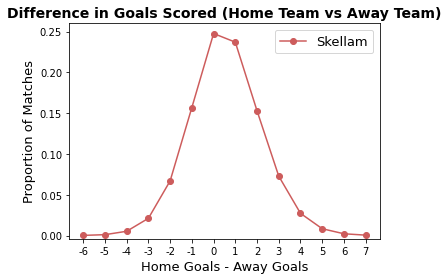

In [ ]:
from scipy.stats import poisson,skellam
team_df= fin_rank[['home_team', 'away_team', 'home_score', 'away_score']]
skellam_pred = [skellam.pmf(i,  team_df.mean()[0],  team_df.mean()[1]) for i in range(-6,8)]
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [ ]:
# encoding the tournament column using the label encorder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
fin_rank['tournament']= label_encoder.fit_transform(fin_rank['tournament']) 
print(fin_rank['tournament'].unique()) 
fin_rank.head()

[27 28  7  9 63 39 38 13  6 12 59 36 26 48 10 31 53 11 23 35 51 18 37 62
 16 40 54 60 47 66 29  2  5  1 34 20 22 43 14 55 15 56 30 61 45 65 58 41
 52 50 24  3 19 25 57 33  4  8 64 21  0 44 42 49 46 17 32]


,date_x,home_team,away_team,home_score,away_score,tournament,city_x,country_x,year,month,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,rank_date_x,date_y,city_y,country_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,rank_date_y,score_difference,result,total_goals
0,1993-08-01,Colombia,Paraguay,0,0,27,Barranquilla,Colombia,1993,8,19,Colombia,COL,0.0,36,16,CONMEBOL,1993-08-08,1993-08-01,Barranquilla,Colombia,67.0,Paraguay,PAR,0.0,22.0,1.0,CONMEBOL,1993-08-08,0,Draw,0
1,1993-08-01,Peru,Argentina,0,1,27,Lima,Peru,1993,8,70,Peru,PER,0.0,16,8,CONMEBOL,1993-08-08,1993-08-01,Lima,Peru,5.0,Argentina,ARG,0.0,51.0,5.0,CONMEBOL,1993-08-08,-1,Lose,1
2,1993-08-01,Uruguay,Ecuador,0,0,27,Montevideo,Uruguay,1993,8,22,Uruguay,URU,0.0,47,-6,CONMEBOL,1993-08-08,1993-08-01,Montevideo,Uruguay,35.0,Ecuador,ECU,0.0,23.0,30.0,CONMEBOL,1993-08-08,0,Draw,0
3,1993-08-01,Venezuela,Brazil,1,5,27,San Cristóbal,Venezuela,1993,8,94,Venezuela,VEN,0.0,4,31,CONMEBOL,1993-08-08,1993-08-01,San Cristóbal,Venezuela,8.0,Brazil,BRA,0.0,55.0,-5.0,CONMEBOL,1993-08-08,-4,Lose,6
4,1993-08-07,Senegal,Zambia,0,0,27,Abidjan,Ivory Coast,1993,8,58,Senegal,SEN,0.0,27,-7,CAF,1993-08-08,1993-08-07,Abidjan,Ivory Coast,25.0,Zambia,ZAM,0.0,38.0,7.0,CAF,1993-08-08,0,Draw,0


In [ ]:
# encoding the result column using the label encorder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
fin_rank['result']= label_encoder.fit_transform(fin_rank['result']) 
#print(fin_rank['tournament'].unique()) 
fin_rank

,date_x,home_team,away_team,home_score,away_score,tournament,city_x,country_x,year,month,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,rank_date_x,date_y,city_y,country_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,rank_date_y,score_difference,result,total_goals
0,1993-08-01,Colombia,Paraguay,0,0,27,Barranquilla,Colombia,1993,8,19,Colombia,COL,0.00,36,16,CONMEBOL,1993-08-08,1993-08-01,Barranquilla,Colombia,67.0,Paraguay,PAR,0.00,22.0,1.0,CONMEBOL,1993-08-08,0,0,0
1,1993-08-01,Peru,Argentina,0,1,27,Lima,Peru,1993,8,70,Peru,PER,0.00,16,8,CONMEBOL,1993-08-08,1993-08-01,Lima,Peru,5.0,Argentina,ARG,0.00,51.0,5.0,CONMEBOL,1993-08-08,-1,1,1
2,1993-08-01,Uruguay,Ecuador,0,0,27,Montevideo,Uruguay,1993,8,22,Uruguay,URU,0.00,47,-6,CONMEBOL,1993-08-08,1993-08-01,Montevideo,Uruguay,35.0,Ecuador,ECU,0.00,23.0,30.0,CONMEBOL,1993-08-08,0,0,0
3,1993-08-01,Venezuela,Brazil,1,5,27,San Cristóbal,Venezuela,1993,8,94,Venezuela,VEN,0.00,4,31,CONMEBOL,1993-08-08,1993-08-01,San Cristóbal,Venezuela,8.0,Brazil,BRA,0.00,55.0,-5.0,CONMEBOL,1993-08-08,-4,1,6
4,1993-08-07,Senegal,Zambia,0,0,27,Abidjan,Ivory Coast,1993,8,58,Senegal,SEN,0.00,27,-7,CAF,1993-08-08,1993-08-07,Abidjan,Ivory Coast,25.0,Zambia,ZAM,0.00,38.0,7.0,CAF,1993-08-08,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,2018-06-28,Senegal,Colombia,0,1,26,Samara,Russia,2018,6,27,Senegal,SEN,837.98,825,1,CAF,2018-06-07,2018-06-28,Samara,Russia,16.0,Colombia,COL,985.97,989.0,0.0,CONMEBOL,2018-06-07,-1,1,1
18800,2018-06-28,Panama,Tunisia,1,2,26,Saransk,Russia,2018,6,55,Panama,PAN,571.17,574,0,CONCACAF,2018-06-07,2018-06-28,Saransk,Russia,21.0,Tunisia,TUN,909.91,1012.0,-7.0,CAF,2018-06-07,-1,1,3
18801,2018-06-28,England,Belgium,0,1,26,Kaliningrad,Russia,2018,6,12,England,ENG,1050.84,1040,1,UEFA,2018-06-07,2018-06-28,Kaliningrad,Russia,3.0,Belgium,BEL,1298.32,1346.0,0.0,UEFA,2018-06-07,-1,1,1
18802,2018-06-30,France,Argentina,4,3,26,Kazan,Russia,2018,6,7,France,FRA,1198.13,1166,0,UEFA,2018-06-07,2018-06-30,Kazan,Russia,5.0,Argentina,ARG,1241.45,1254.0,0.0,CONMEBOL,2018-06-07,1,2,7


In [ ]:
fin_df = fin_rank.dropna()
fin_df

,date_x,home_team,away_team,home_score,away_score,tournament,city_x,country_x,year,month,rank_x,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,confederation_x,rank_date_x,date_y,city_y,country_y,rank_y,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,confederation_y,rank_date_y,score_difference,result,total_goals
0,1993-08-01,Colombia,Paraguay,0,0,27,Barranquilla,Colombia,1993,8,19,Colombia,COL,0.00,36,16,CONMEBOL,1993-08-08,1993-08-01,Barranquilla,Colombia,67.0,Paraguay,PAR,0.00,22.0,1.0,CONMEBOL,1993-08-08,0,0,0
1,1993-08-01,Peru,Argentina,0,1,27,Lima,Peru,1993,8,70,Peru,PER,0.00,16,8,CONMEBOL,1993-08-08,1993-08-01,Lima,Peru,5.0,Argentina,ARG,0.00,51.0,5.0,CONMEBOL,1993-08-08,-1,1,1
2,1993-08-01,Uruguay,Ecuador,0,0,27,Montevideo,Uruguay,1993,8,22,Uruguay,URU,0.00,47,-6,CONMEBOL,1993-08-08,1993-08-01,Montevideo,Uruguay,35.0,Ecuador,ECU,0.00,23.0,30.0,CONMEBOL,1993-08-08,0,0,0
3,1993-08-01,Venezuela,Brazil,1,5,27,San Cristóbal,Venezuela,1993,8,94,Venezuela,VEN,0.00,4,31,CONMEBOL,1993-08-08,1993-08-01,San Cristóbal,Venezuela,8.0,Brazil,BRA,0.00,55.0,-5.0,CONMEBOL,1993-08-08,-4,1,6
4,1993-08-07,Senegal,Zambia,0,0,27,Abidjan,Ivory Coast,1993,8,58,Senegal,SEN,0.00,27,-7,CAF,1993-08-08,1993-08-07,Abidjan,Ivory Coast,25.0,Zambia,ZAM,0.00,38.0,7.0,CAF,1993-08-08,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18799,2018-06-28,Senegal,Colombia,0,1,26,Samara,Russia,2018,6,27,Senegal,SEN,837.98,825,1,CAF,2018-06-07,2018-06-28,Samara,Russia,16.0,Colombia,COL,985.97,989.0,0.0,CONMEBOL,2018-06-07,-1,1,1
18800,2018-06-28,Panama,Tunisia,1,2,26,Saransk,Russia,2018,6,55,Panama,PAN,571.17,574,0,CONCACAF,2018-06-07,2018-06-28,Saransk,Russia,21.0,Tunisia,TUN,909.91,1012.0,-7.0,CAF,2018-06-07,-1,1,3
18801,2018-06-28,England,Belgium,0,1,26,Kaliningrad,Russia,2018,6,12,England,ENG,1050.84,1040,1,UEFA,2018-06-07,2018-06-28,Kaliningrad,Russia,3.0,Belgium,BEL,1298.32,1346.0,0.0,UEFA,2018-06-07,-1,1,1
18802,2018-06-30,France,Argentina,4,3,26,Kazan,Russia,2018,6,7,France,FRA,1198.13,1166,0,UEFA,2018-06-07,2018-06-30,Kazan,Russia,5.0,Argentina,ARG,1241.45,1254.0,0.0,CONMEBOL,2018-06-07,1,2,7


# Approach 2: Logistic Approach

In [ ]:
fin_df.columns

Index(['date_x', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city_x', 'country_x', 'year', 'month', 'rank_x',
       'country_full_x', 'country_abrv_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'confederation_x', 'rank_date_x',
       'date_y', 'city_y', 'country_y', 'rank_y', 'country_full_y',
       'country_abrv_y', 'total_points_y', 'previous_points_y',
       'rank_change_y', 'confederation_y', 'rank_date_y', 'score_difference',
       'result', 'total_goals'],
      dtype='object')

In [ ]:
# Splitting our dataset into train and test data
#
X = fin_df[['home_score', 'away_score', 'rank_x', 'rank_y', 'tournament' ]]
y = fin_df["result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# To fit the model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

array([2, 1, 2, ..., 2, 2, 0], dtype=int64)

In [ ]:
import numpy as np
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
# count of predicted array only
# 0 - represent the match scores that resulted to a draw and 1 rep those matches played that resulted to  loss
# 2 represent the matches that resulted to a win
# 1198 draw, 1427 loss and 2485 win

Frequency of unique values of the said array:
[[   0    1    2]
 [1198 1427 2485]]


In [ ]:
import numpy as np
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2]
 [1198 1427 2485]]


In [ ]:
# evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
# The results from the confusion matrix tell us that 1198(matches that resulted to a draw), 1427(matches resulting to a loss) 
# 2485(matches tht resulted to a win)
# are the number of correct predictions. 
# number of incorrect preditions is 0 in this case


# how accurate is our model= (1198+1427+2485)/len(y_pred)

array([[1198,    0,    0],
       [   0, 1427,    0],
       [   0,    0, 2485]])

In [ ]:
accuracy= (1198+1427+2485)/len(y_pred)
accuracy
# our model is 100% accurate

1.0

In [ ]:
Error=1-accuracy
Error

0.0